In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("fifa_data.csv")
df.shape


(18207, 89)

In [2]:
df = df.drop(['Unnamed: 0', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value',
              'Wage','Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
              'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
              'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
              'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GKDiving', 'GKHandling', 
              'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'], axis = 1)


In [3]:
df.shape
df.isnull().sum()

ID                  0
Name                0
Position           60
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()
df.shape

(18147, 32)

In [5]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [6]:
# Convert the current 27 positions into 4 main position disciplines, Attacker, Midfielder, Defender, Goalkeeper
att = dict.fromkeys(['ST', 'LW', 'RW', 'LS', 'RS', 'CF', 'RF', 'LF'], 'Attacker')
mid = dict.fromkeys(['CM', 'RM', 'LM', 'CAM', 'CDM', 'LCM', 'RCM', 'RDM', 'LDM', 'RAM', 'LAM'], 'Midfielder')
dfnc = dict.fromkeys(['CB', 'LB', 'RB', 'RCB', 'LCB', 'RWB', 'LWB' ], 'Defender')
df.Position.replace('GK', 'Goalkeeper', inplace=True)
df.Position.replace(att, inplace=True)
df.Position.replace(mid, inplace=True)
df.Position.replace(dfnc, inplace=True)
df['Position'].value_counts()

Midfielder    6838
Defender      5866
Attacker      3418
Goalkeeper    2025
Name: Position, dtype: int64

In [7]:
# Check for duplicate players using the players unique player ID
df.duplicated('ID').sum()

0

In [8]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
X = df[feature_cols]
print(X.shape)

# Assign the outcomes
y = df['Position']
print(y.shape)
print(X.head())

(18147, 29)
(18147,)
   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     87.0       88.0   
2      79.0       87.0             62.0          84.0     84.0       96.0   
3      17.0       13.0             21.0          50.0     13.0       18.0   
4      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  BallControl  ...  LongShots  Aggression  \
0   93.0        94.0         87.0         96.0  ...       94.0        48.0   
1   81.0        76.0         77.0         94.0  ...       93.0        63.0   
2   88.0        87.0         78.0         95.0  ...       82.0        56.0   
3   21.0        19.0         51.0         42.0  ...       12.0        38.0   
4   85.0        83.0         91.0         91.0  ...       91.0        76.0   

   Interceptions  Positioning  Vision  Penaltie

In [9]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [10]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)
    plt.ylabel('F1 score')
    plt.legend(loc='best')
    plt.show()



In [11]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('F1 score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)

scaler=StandardScaler()
data_prep=make_column_transformer((scaler,make_column_selector(dtype_include='float64')))
s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)


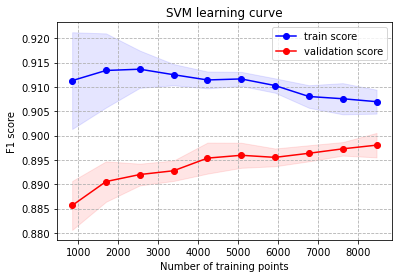

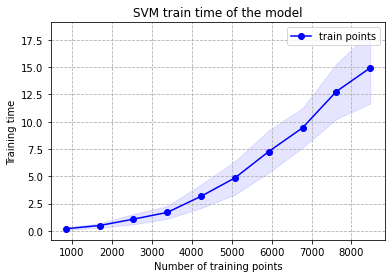

SVM: F1 score= 0.897
              precision    recall  f1-score   support

    Attacker       0.89      0.73      0.80      1025
    Defender       0.93      0.93      0.93      1760
  Goalkeeper       1.00      1.00      1.00       608
  Midfielder       0.83      0.89      0.86      2052

    accuracy                           0.89      5445
   macro avg       0.91      0.89      0.90      5445
weighted avg       0.89      0.89      0.89      5445

[[ 748    5    0  272]
 [   0 1644    0  116]
 [   0    0  608    0]
 [  92  127    0 1833]]


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [15]:
pipeline = make_pipeline(data_prep,svm.SVC(probability =True))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'SVM learning curve')
plot_train_time_curve(train_sizes, fit_times, 'SVM train time of the model')


from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)


# calculate pr auc
y_pred = pipeline.predict(X_test)
print('SVM: F1 score= %.3f' %  f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

pipeline.steps[1][1].get_params()

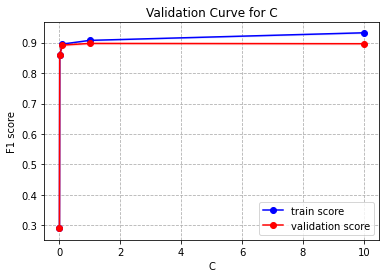

In [14]:
from sklearn.model_selection import validation_curve
C = [.001,.01,.1,1,10]
pipeline = make_pipeline(data_prep,svm.SVC(probability =True))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_train, y=y_train, param_name="svc__C", param_range=C,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(C, train_scores, test_scores, 'C', title="Validation Curve for C",alpha=0.1)

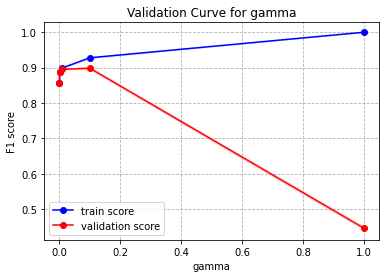

In [15]:
from sklearn.model_selection import validation_curve
gamma_range = [0.0001,.001,.01,.1,1]
pipeline = make_pipeline(data_prep,svm.SVC(C=1.0,probability =True))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_train, y=y_train, param_name="svc__gamma", param_range=gamma_range,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(gamma_range, train_scores, test_scores, 'gamma', title="Validation Curve for gamma", alpha=0.1)

In [17]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
pipeline = make_pipeline(data_prep,svm.SVC(probability =True))
C = [.001,.01,.1,1,10]
gamma_range = [0.0001,.001,.01,.1,1]
parameters = dict(svc__C=C,svc__gamma=gamma_range)
#grid_search_cv = GridSearchCV(pipeline, parameters,cv=s_kfold, scoring='average_precision')
random_search_cv = RandomizedSearchCV(pipeline, parameters,cv=s_kfold,n_iter=50,scoring='f1_macro',n_jobs=-1)
random_search_cv.fit(X_train, y_train)
print("Tuned SVC best params: {}".format(random_search_cv.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 25 is smaller than n_iter=50. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned SVC best params: {'svc__gamma': 0.01, 'svc__C': 10}


In [16]:
grid_search_cv.best_estimator_.steps[1][1].get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 23,
 'p': 2,
 'weights': 'distance'}

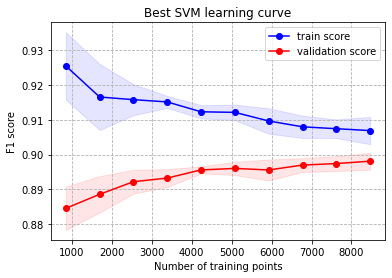

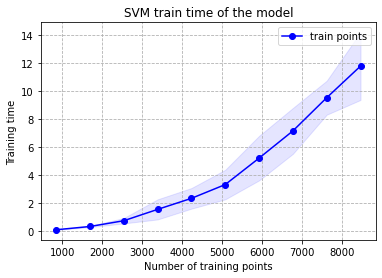

SVM: Predict Time= 0.932
SVM: F1 score= 0.898
              precision    recall  f1-score   support

    Attacker       0.89      0.74      0.81      1025
    Defender       0.93      0.93      0.93      1760
  Goalkeeper       1.00      1.00      1.00       608
  Midfielder       0.83      0.89      0.86      2052

    accuracy                           0.89      5445
   macro avg       0.91      0.89      0.90      5445
weighted avg       0.89      0.89      0.89      5445

[[ 756    5    0  264]
 [   0 1645    0  115]
 [   0    0  608    0]
 [  97  127    0 1828]]


In [14]:
pipeline = make_pipeline(data_prep,svm.SVC(C=10, gamma=.01,probability =True))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best SVM learning curve')
plot_train_time_curve(train_sizes, fit_times, 'SVM train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)


# calculate pr auc
import time
start = time.time()
y_pred = pipeline.predict(X_test)
diff=time.time() - start
print('SVM: Predict Time= %.3f' %  diff)
print('SVM: F1 score= %.3f' %  f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [14]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
pipeline = make_pipeline(data_prep,svm.SVC(kernel='linear',probability =True))
C = [.001,.01,.1,1,10]
parameters = dict(svc__C=C)
#grid_search_cv = GridSearchCV(pipeline, parameters,cv=s_kfold, scoring='average_precision')
random_search_cv = RandomizedSearchCV(pipeline, parameters,cv=s_kfold,n_iter=50,scoring='f1_macro',n_jobs=-1)
random_search_cv.fit(X_train, y_train)
print("Tuned SVC best params: {}".format(random_search_cv.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 5 is smaller than n_iter=50. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned SVC best params: {'svc__C': 0.1}


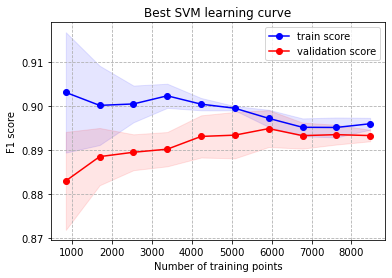

SVM: F1 score= 0.892
              precision    recall  f1-score   support

    Attacker       0.86      0.76      0.81      1025
    Defender       0.92      0.92      0.92      1760
  Goalkeeper       1.00      1.00      1.00       608
  Midfielder       0.82      0.87      0.84      2052

    accuracy                           0.88      5445
   macro avg       0.90      0.89      0.89      5445
weighted avg       0.88      0.88      0.88      5445

[[ 781    3    0  241]
 [   1 1612    0  147]
 [   0    0  608    0]
 [ 128  142    0 1782]]


<Figure size 432x288 with 0 Axes>

In [17]:
pipeline = make_pipeline(data_prep,svm.SVC(C=0.1,kernel='linear',probability =True))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best SVM learning curve')
plot_train_time_curve(train_sizes, fit_times, 'SVM train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)


# calculate pr auc
import time
start = time.time()
y_pred = pipeline.predict(X_test)
diff=time.time() - start
print('SVM: Predict Time= %.3f' %  diff)
print('SVM: F1 score= %.3f' %  f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

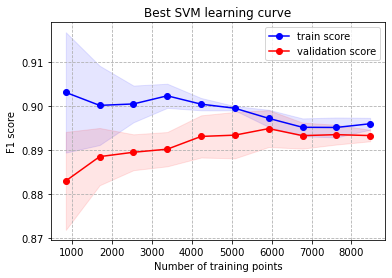

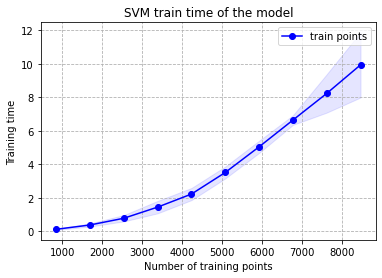

SVM: Predict Time= 0.495
SVM: F1 score= 0.892
              precision    recall  f1-score   support

    Attacker       0.86      0.76      0.81      1025
    Defender       0.92      0.92      0.92      1760
  Goalkeeper       1.00      1.00      1.00       608
  Midfielder       0.82      0.87      0.84      2052

    accuracy                           0.88      5445
   macro avg       0.90      0.89      0.89      5445
weighted avg       0.88      0.88      0.88      5445

[[ 781    3    0  241]
 [   1 1612    0  147]
 [   0    0  608    0]
 [ 128  142    0 1782]]


In [13]:
pipeline = make_pipeline(data_prep,svm.SVC(C=0.1,kernel='linear',decision_function_shape='ovo',probability =True))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best SVM learning curve')
plot_train_time_curve(train_sizes, fit_times, 'SVM train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

import time
start = time.time()
y_pred = pipeline.predict(X_test)
diff=time.time() - start
print('SVM: Predict Time= %.3f' %  diff)
print('SVM: F1 score= %.3f' %  f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))